**Laboratorio 3**



**Estudiante: Cristino Pérez Ramos**

In [ ]:
# Librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Parte 1 - Numpy

1) ¿Cuál es el tamaño en bytes de un array de 1000  
elementos de tipo booleano? 


In [ ]:
my_array = np.arange(0,1000)
nbytes=my_array.nbytes

In [ ]:
print("El número de bytes de un array de 100 elementos es ",nbytes," bytes")

El número de bytes de un array de 100 elementos es  8000  bytes


2) Cree un array cuyos elementos sean los enteros pares en
[1,100] y en orden decreciente. Muestre los 10 últimos
por pantalla. 

In [ ]:
elementos = np.sort(np.array([i for i in range(1,1001) if i%2==0]))[::-1]


In [ ]:
print(elementos[490:500])

[20 18 16 14 12 10  8  6  4  2]


 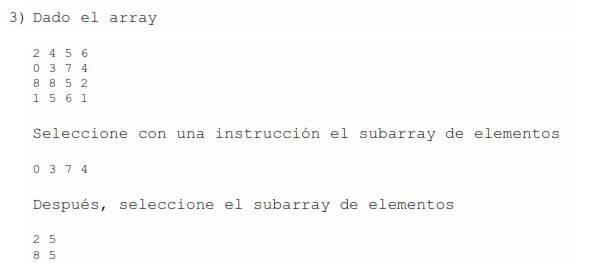

In [ ]:
array3 = np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])

In [ ]:
array3[1]   #Elementos 0 3  7 4

array([0, 3, 7, 4])

In [ ]:
array3[[[0],[2]], [0, 2]]    #Elementos [ 2  5] [ 8 5]


array([[2, 5],
       [8, 5]])

4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9],
obtenga la media aritmética de la diferencia (a-b). 

In [ ]:
a= np.array([1,4,2,7]) 
b = np.array([1,3,2,9])

media = (a-b).mean()
print("Media de a-b: ",media)

Media de a-b:  -0.25


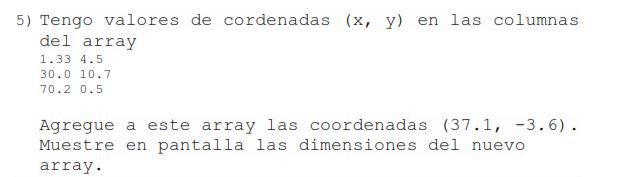

In [ ]:
coordenadas = np.array([[1.33,4.5],[30.0,10.7],[70.2,0.5]])

In [ ]:
nueva_coordenada =np.array([37.1,-3.6])

In [ ]:
coordenadas=np.vstack([coordenadas,nueva_coordenada])
coordenadas

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [37.1 , -3.6 ]])

In [ ]:
print("Las dimensiones del nuevo array son:", coordenadas.ndim)

Las dimensiones del nuevo array son: 2


6) Copie el array del ejercicio anterior. Traspóngalo (.
Agregue ahora dos nuevos pares de coordenadas: (10.8,
3.0) y (35.8, 12.0).

In [ ]:
coordenadas_copy = coordenadas.copy()

In [ ]:
coordenadas_copy.T
nuevas= np.array([10.8,3.0,35.8,12.0])
coordenadas_copy = np.vstack([coordenadas_copy.T, nuevas])
coordenadas_copy.T

array([[ 1.33,  4.5 , 10.8 ],
       [30.  , 10.7 ,  3.  ],
       [70.2 ,  0.5 , 35.8 ],
       [37.1 , -3.6 , 12.  ]])

#Parte 2: Exploración y Mineria de Datos

In [ ]:
data= pd.read_csv("/content/NucleosPoblacion.csv")

In [ ]:
data.head(5)

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


 **1) ¿Cuántos Municipios tienen más de 100000
habitantes?.**

In [ ]:
num_municipios = (data['Poblacion'] > 100000).apply(lambda x: 1 if x else 0).sum()
print("El número de municipios con más de 100000 habitantes es ", num_municipios)


El número de municipios con más de 100000 habitantes es  62


###2. Realice una gráfica** de barras sobre la población de cada ciudad, ordenela de menor a mayo y responda:

### a. ¿Cuál es la segunda ciudad más poblada?


In [ ]:
df_ciudades = data.groupby('Provincia')['Poblacion'].sum().reset_index()
df_ciudades_orden =df_ciudades.sort_values(by='Poblacion').reset_index()
df_final=df_ciudades_orden.drop('index', axis=1)
df_final.tail(2) #BARCELONA ES LA SEGUNDA CIUDAD MAS POBLADA

,Provincia,Poblacion
50,Barcelona,4934795.0
51,Madrid,6315312.0


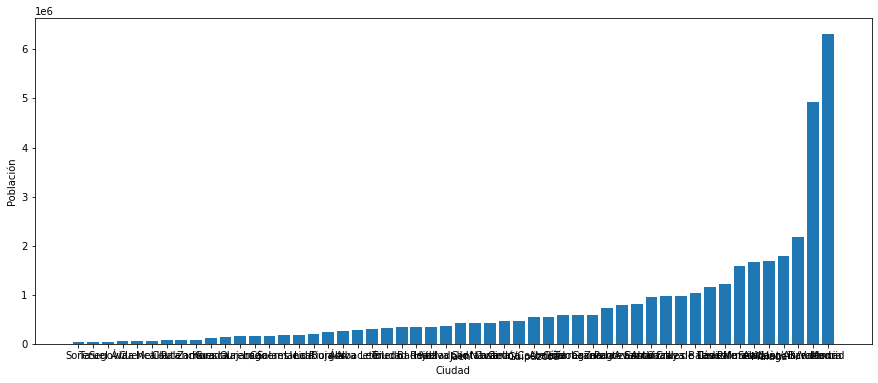

In [ ]:
plt.figure(figsize=(15,6))


# Crear una gráfica de barras
plt.bar(df_final['Provincia'], df_final['Poblacion'])

# Configurar las etiquetas del eje x y y
plt.xlabel('Ciudad')
plt.ylabel('Población')

# Mostrar la gráfica
plt.show()

### b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas? 

In [ ]:
df_final.loc[(df_final['Provincia'] == 'Granada')]
#R// Ocupa la posición 14 porque 51-35 = 14

,Provincia,Poblacion
35,Granada,604357.0


###3) ¿Cuántos municipios de Extremadura tienen más de 5000
habitantes? 

In [ ]:
num_municipios_extremadura = (data['Provincia']=='extremadura' ).apply(lambda x: 1 if x else 0).sum()
num_municipios_extremadura

0

## 4 ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [ ]:
max_norte= data.loc[data['Y'] == data['Y'].max()]
max_norte[['Provincia','Poblacion','Y']]

,Provincia,Poblacion,Y
104,Lugo,16211.0,43.625578


### 5 Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [ ]:
df_granada = data.loc[data['Provincia'] == 'Granada']
print("Media: ", df_granada['Poblacion'].mean())
print("Mediana: ", df_granada['Poblacion'].median())
print("Desviación Estándar: ", df_granada['Poblacion'].std())
print("Valor máximo: ", df_granada['Poblacion'].max())
print("Valor Minimo:", df_granada['Poblacion'].min())

Media:  30217.85
Mediana:  17526.0
Desviación Estándar:  50355.49171459276
Valor máximo:  239154.0
Valor Minimo: 10386.0


### 6 Realice un histograma con la población de los Municipios para cada una de las provincias.  

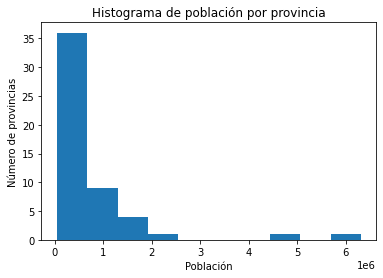

In [ ]:
poblacion_por_provincia = data.groupby('Provincia')['Poblacion'].sum()


plt.hist(poblacion_por_provincia, bins=10)

plt.xlabel('Población')
plt.ylabel('Número de provincias')
plt.title('Histograma de población por provincia')

plt.show()

##7 Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?. 

In [ ]:
import random
municipios = random.sample(list(data['Municipio']), 50)

df_sample = data[data['Municipio'].isin(municipios)]


promedio = df_sample['Poblacion'].mean()
desviacion_estandar = df_sample['Poblacion'].std()

print('Promedio de la población: ', promedio)
print('Desviación estándar de la población: ', desviacion_estandar)

Promedio de la población:  37955.28333333333
Desviación estándar de la población:  44688.959211341426


### 8 Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero. 

In [ ]:
print(data.loc[data['Municipio']=='Madrid']['X'])
print(data.loc[data['Municipio']=='Madrid']['Y'])

355   -3.703797
Name: X, dtype: float64
355    40.41663
Name: Y, dtype: float64


In [ ]:
data['Distancia A Madrid'] = np.sqrt((data['X']-3.703797)**2+(data['Y']-40.41663)**2)

In [231]:
data_ordenada= data.sort_values(by='Distancia A Madrid')

In [232]:
# Municipios más cercanos
data_ordenada.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,Distancia A Madrid
602,602,603,Ciutadella,29247.0,7015,Ciutadella de Menorca,7,Illes Balears,3.837940,40.001919,0.435866
601,601,602,Capdepera,11929.0,7014,Capdepera,7,Illes Balears,3.433358,39.702721,0.763416
607,607,608,Maó,29050.0,7032,Maó,7,Illes Balears,4.265466,39.887522,0.771639
598,598,599,Alcúdia,19112.0,7003,Alcúdia,7,Illes Balears,3.120522,39.851332,0.812263
619,619,620,Son Servera,12286.0,7062,Son Servera,7,Illes Balears,3.360063,39.620439,0.867222


In [233]:
#Muncipios más lejanos
data_ordenada.tail()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,Distancia A Madrid
21,21,22,Adeje,43801.0,38001,Adeje,38,Santa Cruz de Tenerife,-16.729708,28.118880,23.848748
765,765,766,Los Cristianos,19383.0,38006,Arona,38,Santa Cruz de Tenerife,-16.716798,28.053827,23.871313
764,764,765,Playa de las Américas,18562.0,38001,Adeje,38,Santa Cruz de Tenerife,-16.729436,28.068070,23.874755
35,35,36,Santa Cruz de la Palma,17128.0,38037,Santa Cruz de la Palma,38,Santa Cruz de Tenerife,-17.765386,28.684138,24.465837
29,29,30,Los Llanos de Aridane,20948.0,38024,Los Llanos de Aridane,38,Santa Cruz de Tenerife,-17.914361,28.658639,24.608843
